#### Import Data set

In [1]:
import pandas as pd
df=pd.read_csv('C:/Users/Balu Boda/Downloads/archive/indexData.csv')
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


#### Describe data

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,110253.000000,110253.000000,110253.000000,110253.000000,110253.000000,1.102530e+05
mean,7658.515222,7704.372961,7608.000422,7657.545872,7657.351729,1.273975e+09
std,9011.478913,9066.638548,8954.506981,9011.510444,9011.608900,4.315783e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1855.030029,1864.510010,1843.979980,1855.060059,1854.179565,0.000000e+00
50%,5194.089844,5226.279785,5154.049805,5194.750000,5194.750000,4.329000e+05
75%,10134.299810,10207.820310,10060.349610,10134.830080,10134.830080,1.734314e+08
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10


#### Check Null values

In [5]:
df.isnull().sum()

Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

#### Drop Null values - > not used for prediction 

In [13]:
data_without_na=df.dropna()
data_without_na

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


##### Chcek the data types

In [14]:
data_without_na.dtypes

Index         object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

#### Changed Date 'object' to Datetime

In [15]:
data_without_na["Date"] = pd.to_datetime(data_without_na["Date"])

<ipython-input-15-f216bba7a2d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_na["Date"] = pd.to_datetime(data_without_na["Date"])


In [16]:
data_without_na.dtypes

Index                object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

#### Get Last 5 years data -for training data, and the last month as the prediction.

In [19]:
data_train = data_without_na[data_without_na.Date > "2016-06-01"]
data_train

,Index,Date,Open,High,Low,Close,Adj Close,Volume
12691,NYA,2016-06-02,10424.679690,10487.610350,10403.509770,10487.580080,10487.580080,3.632720e+09
12692,NYA,2016-06-03,10477.780270,10504.459960,10417.900390,10487.940430,10487.940430,3.627780e+09
12693,NYA,2016-06-06,10508.500000,10568.849610,10508.500000,10554.820310,10554.820310,3.442020e+09
12694,NYA,2016-06-07,10554.589840,10626.830080,10554.589840,10599.219730,10599.219730,3.534730e+09
12695,NYA,2016-06-08,10620.190430,10648.049810,10610.209960,10638.360350,10638.360350,3.562060e+09
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,3.796964e+08
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,1.607734e+08
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,9.117370e+07
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,1.551799e+08


#### Build/predict  for 'Korea Exchange'

In [20]:
df_Korea= data_train[data_train["Index"].isin(['KS11'])].sort_values('Date')
df_Korea

,Index,Date,Open,High,Low,Close,Adj Close,Volume
74997,KS11,2016-06-02,1983.859985,1988.000000,1978.819946,1985.109985,1985.109985,474200.0
74998,KS11,2016-06-03,1991.579956,1991.579956,1979.660034,1985.839966,1985.839966,540900.0
74999,KS11,2016-06-07,1993.079956,2011.670044,1992.770020,2011.630005,2011.630005,481300.0
75000,KS11,2016-06-08,2013.719971,2027.089966,2008.589966,2027.079956,2027.079956,497900.0
75001,KS11,2016-06-09,2028.020020,2035.270020,2012.140015,2024.170044,2024.170044,599700.0
...,...,...,...,...,...,...,...,...
76218,KS11,2021-05-26,3171.909912,3183.969971,3160.300049,3168.429932,3168.429932,1269000.0
76219,KS11,2021-05-27,3170.840088,3173.860107,3142.370117,3165.510010,3165.510010,1081100.0
76220,KS11,2021-05-28,3172.090088,3198.659912,3171.850098,3188.729980,3188.729980,966000.0
76221,KS11,2021-05-31,3192.060059,3204.290039,3179.870117,3203.919922,3203.919922,1123100.0


#### showing on the graph

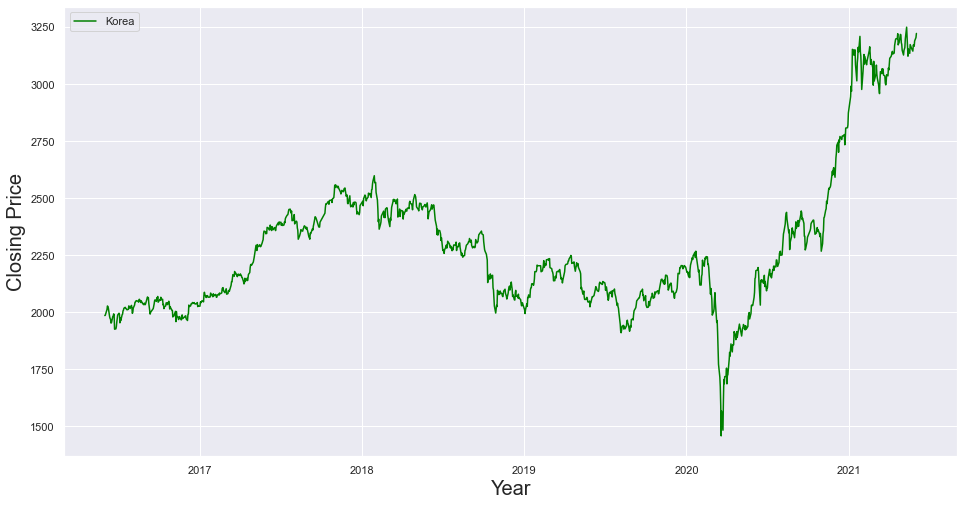

In [25]:
import matplotlib.pylab as plt
plt.plot(df_Korea["Date"],df_Korea["Close"],label='Korea',color="green")
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.rc('axes', labelsize=30) 
plt.legend()

In [26]:
df_Korea_data = df_Korea[["Date","Close"]]

,Date,Close
74997,2016-06-02,1985.109985
74998,2016-06-03,1985.839966
74999,2016-06-07,2011.630005
75000,2016-06-08,2027.079956
75001,2016-06-09,2024.170044
...,...,...
76218,2021-05-26,3168.429932
76219,2021-05-27,3165.510010
76220,2021-05-28,3188.729980
76221,2021-05-31,3203.919922


In [27]:
Korea_data_train = df_Korea_data[df_Korea_data.Date < "2021-04-30"]
Korea_data_test = df_Korea_data[df_Korea_data.Date >= "2021-05-01"]

In [28]:
Korea_data_train

,Date,Close
74997,2016-06-02,1985.109985
74998,2016-06-03,1985.839966
74999,2016-06-07,2011.630005
75000,2016-06-08,2027.079956
75001,2016-06-09,2024.170044
...,...,...
76197,2021-04-23,3181.080078
76198,2021-04-26,3217.530029
76199,2021-04-27,3215.419922
76200,2021-04-28,3181.469971


In [30]:
import datetime as dt
Korea_data_train.Date = Korea_data_train.Date.map(dt.datetime.toordinal)

C:\Users\Lakshmi Sirisha\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [32]:
import numpy as np
X_train = Korea_data_train.Date[:, np.newaxis]

<ipython-input-32-66d7421e8884>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = Korea_data_train.Date[:, np.newaxis]


In [33]:
X_train

array([[736117],
       [736118],
       [736122],
       ...,
       [737907],
       [737908],
       [737909]], dtype=int64)

In [37]:
y_train = Korea_data_train.Close

In [51]:
y_train

74997    1985.109985
74998    1985.839966
74999    2011.630005
75000    2027.079956
75001    2024.170044
            ...     
76197    3181.080078
76198    3217.530029
76199    3215.419922
76200    3181.469971
76201    3174.070068
Name: Close, Length: 1200, dtype: float64

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [38]:
tree = DecisionTreeRegressor(criterion='mse',max_depth=50).fit(X_train, y_train)

In [39]:
linear_reg = LinearRegression().fit(X_train, y_train)

In [40]:
model_rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

In [43]:
X_all = df_Korea_data.Date.map(dt.datetime.toordinal)[:, np.newaxis]

<ipython-input-43-40dfc4998993>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = df_Korea_data.Date.map(dt.datetime.toordinal)[:, np.newaxis]


In [52]:
import numpy.polynomial.polynomial as poly
pred_tree = tree.predict(X_all)
pred_model_rf = model_rf.predict(X_all)
pred_lr = linear_reg.predict(X_all)
X = np.array(Korea_data_train.Date)
y = np.array(Korea_data_train.Close)


In [48]:
df_data_close_withoutnan = df_Korea_data.dropna()

In [55]:
model_coef_polyfit = poly.polyfit(X, y, 3)


In [57]:
X_new = np.array(df_Korea_data.Date.map(dt.datetime.toordinal))
ffit = poly.polyval(X_new, model_coef_polyfit)
X_new = pd.DataFrame(X_new,columns=['Date'])
X_new = X_new.Date.map(dt.datetime.fromordinal)

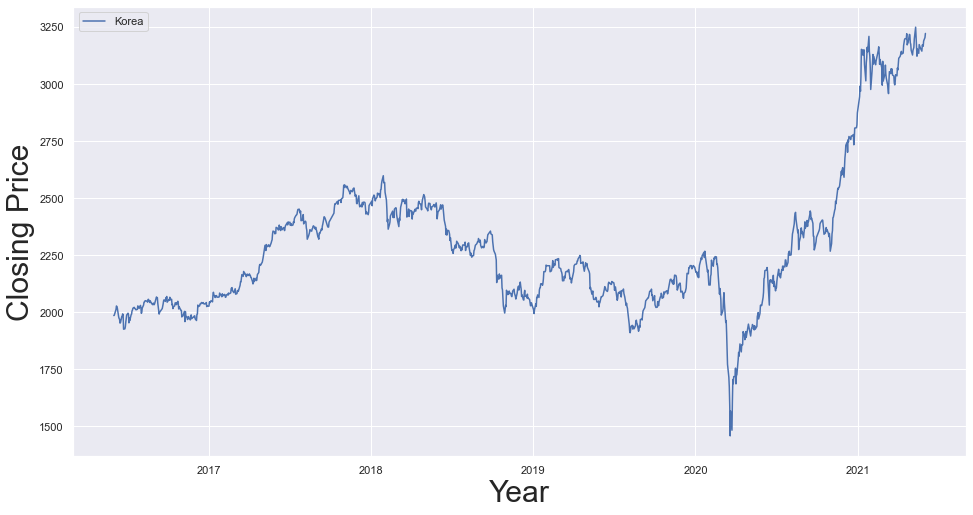

In [80]:
plt.plot(df_Korea_data.Date,df_Korea_data.Close,label='Korea')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.rc('axes', labelsize=30) 
plt.legend()

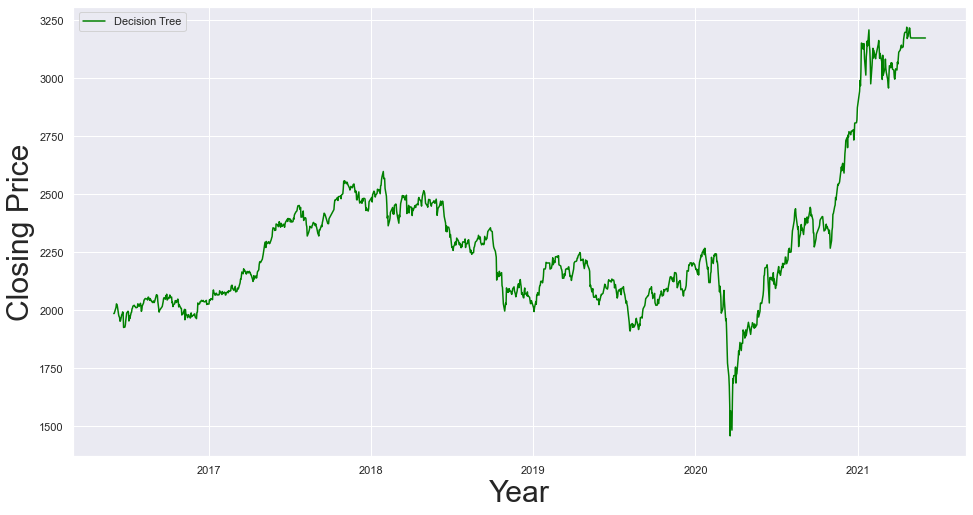

In [81]:
plt.plot(df_Korea_data.Date,pred_tree,label='Decision Tree',color="green")
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.rc('axes', labelsize=30) 
plt.legend()

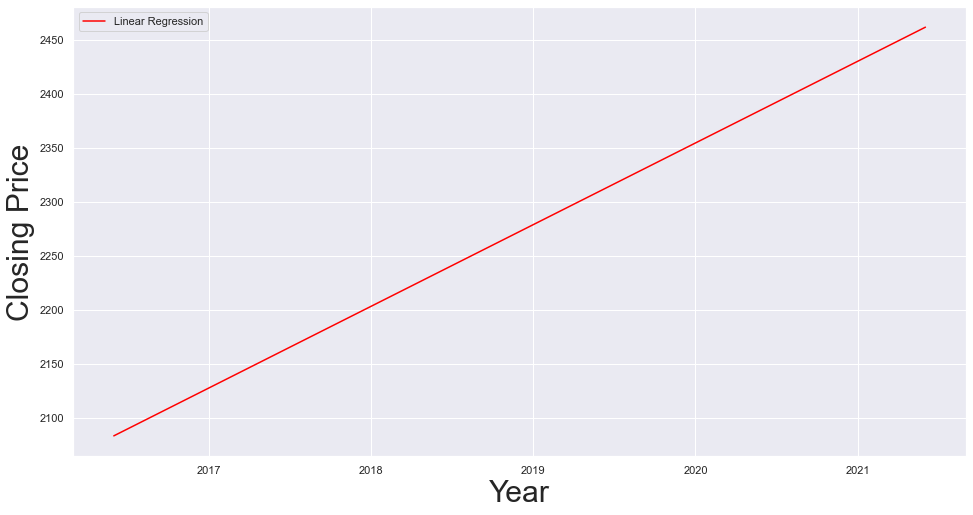

In [82]:
plt.plot(df_Korea_data.Date,pred_lr,label='Linear Regression',color='red')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.rc('axes', labelsize=30) 
plt.legend()

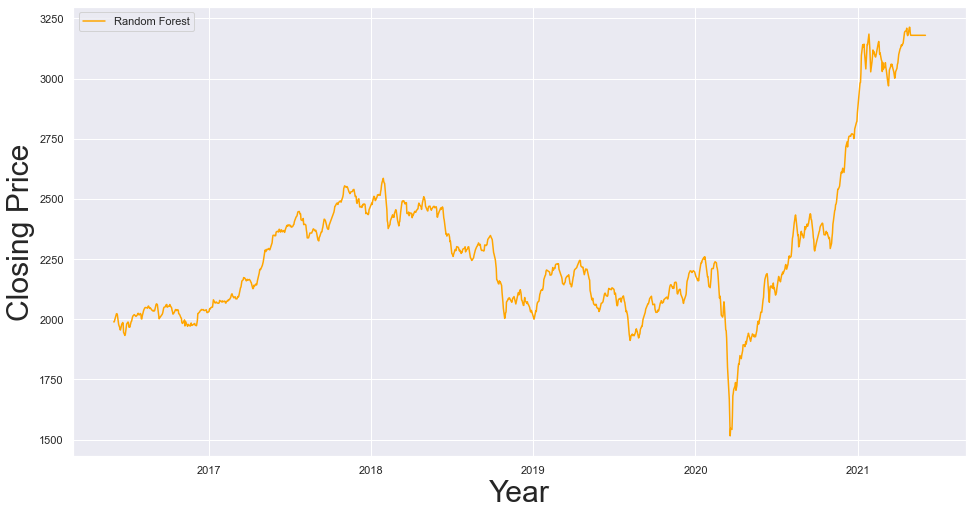

In [83]:
plt.plot(df_Korea_data.Date,pred_model_rf,label='Random Forest',color='orange')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.rc('axes', labelsize=30) 
plt.legend()

#### Check the scores for each  model

In [84]:
tree.score(X_all,df_Korea_data.Close)

0.9998287040964758

In [87]:
linear_reg.score(X_all,df_Korea_data.Close)

0.16406544278071178

In [89]:
model_rf.score(X_all,df_Korea_data.Close)

0.9992349008079804